# Probability & Combinatorics

In [40]:
# import libraries
from math import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# import functions
from proba_combin import *

***
## Permutations & Combinations

### `Without` replacement

$P^n_r = \frac{n!}{(n-r)!} $

$C^n_r = \frac{n!}{r!(n-r)!}$

$n$ : total, $r$ : selected

Notice how the permutation and combination formula differ by $\frac{1}{r!}$. This is because, `in a combination, the selection isn't ordered` so we must divide by the number of ways the elements can be ordered in, which is $r!$

<i>Example</i>

Say we have 3 letters (A, B, C) and we want to create words of length 3.

A permutation would give us ABC, ACB, BAC, BCA, CAB, and CBA, 6 words.

In a combination, all of these words are considered the same. Notice how the number of words given in this example permutation is equal to $r!$, which is $3! == 6$ in this case.

***
### `With` replacement

$P^n_r = n^r$

$C^n_r = \frac{(n-1+r)!}{r!(n-1)!}$

$n$ : total, $r$ : selected

For this combinaton formula, $ n - 1 $ counts the the number of separations between the elements to be selected. $ r $ is the number of places to fill. 

Because repeats are allowed, there are $ n - 1 + r $ choices. The $ ! $ counts the number of all arrangements of those choices.

But since this is a combination, the order doens't matter. 
$ \frac{1}{r!} $ is to remove the arrangements of identical elements.
$ \frac{1}{(n-1)!} $ is to remove the arrangements of separations.

***
## Discrete Random Variables

$P(E) = \frac{|E|}{\Omega}$

$E$ : event of interest, $\Omega$ : all outcomes

In terms of a random variable $X$, this would be written as $P(X = value)$ This reads as, the probability that $X$ is equal to $value$. In other words, $E : X = value$.

Note : the value of $X$ is not to be calculated. The calculation is the probability of $X$ being a given value.

### Expectation / Espérance

expectation : mean of the random variable / weighted sum of the outcomes

$ E(X) = \mu = \sum_x {xP(X=x)} $


### Variance and Standard Deviation

$Var(X) = \sum_x{[P(X=x)(x-\mu)^2]}$

$\sigma = \sqrt{Var(X)}$

### Manipulating Multiple Discrete Random Variables

$E(X \pm Y) = E(X) \pm E(Y)$ 

If $X$ and $Y$ are independent : 

$Var(X \pm Y) = Var(X) + Var(Y)$

### Covariance

If $X$ and $Y$ are `not` independent but follow a `normal` distribution :

$Var(X \pm Y) = Var(X) + Var(Y) + 2Cov(X,Y)$

covariance : measure of how much 2 random variables change together

$Cov(X,Y) = E[(X-E(X))(Y-E(Y))]$

$ = \sum_x{\sum_y{[(x-E(X))(y-E(Y)) \times P(X=x, Y=y) ]}} $

| value of $Cov(X,Y)$ | significance | 
| :-: | :-: |
| $ > 0 $ | $ X > \mu_x \rightarrow Y > \mu_y $ |
| $ < 0 $ | $ X < \mu_x \rightarrow Y < \mu_y $ |
| $ = 0 $ | uncorrelated, though not necessarily independent |

***
## Probability Distributions

### Bernoulli Distribution

A Bernoulli distribution is a `single trial` with 2 outcomes (success / failure) and 1 parameter.

$P(X=1) = p$

$P(X=0) = 1-p$

***
### Binomial

#### Definition

A Binomial distribution is based on a `series of independent Bernoulli trials` and counts the number of successes in $n$ trials.

##### Characteristics of binomial variables  
- 2 outcomes : success / failure
- fixed number of independent trials
- constant probability of success for each trial

#### 10% Rule of assuming "independence" between trials 

sample $\leq$ 10% of population $\rightarrow$ can assume independence

$P(X=k) = (n,k) = p^k(1-p)^{n-k}$

$p$ probability of success, $k$ number of successes, $n$ total number of trials

The result is a decimal that when multiplied by 100 will give the percentage probability.

#### Visualisation of a Binomial Distribution example

<i>Example</i>

A product has a 3% probability of bein defective. 1 batch contains 100 products. Calculate the probability that exactly 5 products are defective.

In [108]:
p = 0.03; n = 100; k = 5

print(f'p = {p}, n = {n}, k = {k}\n')
print("probability of 5 products being defective")
print(f'P(X = {k}) = {round(binomial(p,n,k),12)*100}%')

p = 0.03, n = 100, k = 5

probability of 5 products being defective
P(X = 5) = 1.346e-07%


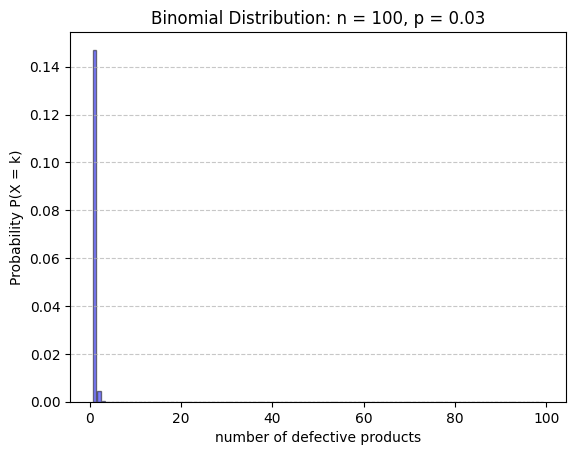

In [114]:
bin_idx = list(range(0,n))
binomial_proba = [binomial(p, n, i)*100 for i in bin_idx]
plt.bar(bin_idx[1:],binomial_proba[1:], alpha=0.5, color="blue", edgecolor="black")
plt.xlabel("number of defective products")
plt.ylabel("Probability P(X = k)")
plt.title("Binomial Distribution: n = 100, p = 0.03")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

How about we plot the distribution of the probability of finding exactly 5 defective products in batches of varying size?

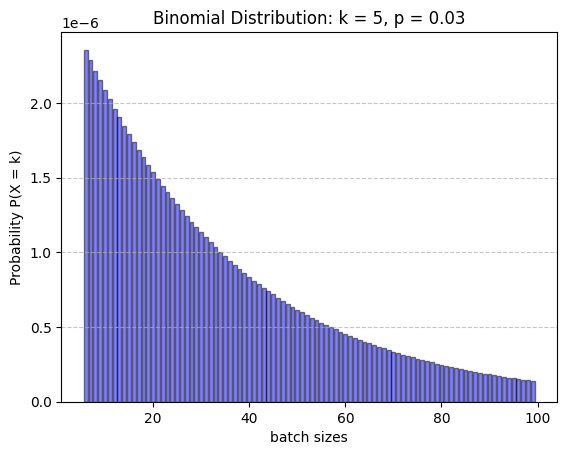

In [115]:
bin_idx = list(range(5,100))
binomial_proba = [binomial(p,i,k)*100 for i in bin_idx]
plt.bar(bin_idx[1:],binomial_proba[1:], alpha=0.5, color="blue", edgecolor="black")
plt.xlabel("batch sizes")
plt.ylabel("Probability P(X = k)")
plt.title("Binomial Distribution: k = 5, p = 0.03")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

***
### Poisson

#### Definition

The Poisson distribution calculates the likelihood of a certain `number of events that occur independently of one another and at a constant rate`.

$P(X=k)=e^{-\lambda}\frac{\lambda^{k}}{k!}$

$\lambda$ : the rate at which the events occur

$k$ : the number of events that occur within the time interval implicitly defined in $\lambda$

##### Characteristics of Poisson variables 
- all events independant of one another 
- constant occurrence rate over given interval
- non-negative number of events

#### Visualisation of a Poisson Distribution example

***
### Geometric

#### Definition

The Geometric distribution calculates the `number of trials that occur before the first success`. 

$P(X=x) = (1 - p)^{x-1}p$

##### Characterstics of Geometric variables
- identically Bernoulli trials
    - 2 outcomes : success / failure
    - constant probability of success
- independent

#### Visualisation of a Geometric Distribution example

***
### Normal

#### Definition

The Normal (or Gaussian) distribution is a distribution that is symmetric around the mean and appears as a "bell curve." The mean is 0 and the standard deviation is 1.

$f(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^{2}}$

$\mu$ : mean, $\sigma$ : standard deviation

The distribution's width is defined by the standard deviation, where it acts as the unit of measure as illustrated by the Empirical Rule.

#### Empirical Rule 

![empirical rule image](assets/empiricalrule.png)

68-95-99.7 rule 
| % data points | distance from mean (standard deviations) |
| :-: | :-: |
| 68% | 1 |
| 95% | 2 |
| 99.7 | 3 |

#### Central Limit Theorem

Averages calculated from independent, identically distributed random variables have approximately normal distributions, regardless of the type of distribution from which the variables are sampled. (Normal Distribution, Investopedia)

As the sample size increases and its variance is finite, then the distribution of the sample mean approaches normal distribution irrespective of the shape of the population distribution. 

The distribution of sample means will invariably conform to a normal distribution provided the sample size is sufficiently large regardless of whether the underlying distribution of the population is Normal, Poisson, Binomial, or an alternative distribution. (Geeks for Geeks)

- The distribution of sample means approximates a normal distribution as the sample size gets larger, regardless of the population's distribution.
- A sufficiently large sample size can predict the characteristics of a population more accurately.
- Sample sizes $\geq 30$ are often considered sufficient for the CLT to hold.
- The average of the sample means and standard deviations will equal the population mean and standard deviation.
(Central Limit Theorem, Investopedia)

***
## Random Variables

### Expectation

### Variance

***
## Law of Large Numbers

***
## Central Limit Theorem

***
# Sources

Khan Academy, ChatGPT

Geeks for Geeks
- https://www.geeksforgeeks.org/poisson-distribution/
- https://www.geeksforgeeks.org/geometric-distribution/
- https://www.geeksforgeeks.org/central-limit-theorem/

Investopedia
- https://www.investopedia.com/terms/n/normaldistribution.asp#:~:text=The%20Bottom%20Line-,Normal%20distribution%2C%20also%20known%20as%20the%20Gaussian%20distribution%2C%20is%20a,defined%20by%20the%20standard%20deviation.
- https://www.investopedia.com/terms/c/central_limit_theorem.asp
